# Created by Patrick Callahan
# Purpose: Minimize the amount of guesses for NYTimes Wordle Game

## How it works: 
- The inspiration for this program came from https://www.youtube.com/watch?v=v68zYyaEmEA&t=787s. All the code was written by me, but the idea of a Wordle solver program came from watching the youtube as I had not known that the list of words that is used is available in the Developer mode on the website. 
- The program works the following way: 
    - Reference over 5,000 most common 5-letter words from the Stanford txt file of 5 letter words: https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt
    - Use NLP techniques to find the most common letters
    - Use the 5 most common letters and vowels to go through the list of possible Wordle words and return the best first guesses
    - Once a guess is made, I made lists of green letters, yellow letters, and gray letters. With this I can use regular expressions to find words that are in the Wordle word list based off that information.
    - This process is repeated for more guesses until the player gets it right. This algorithm will get the answer the majority of the time in 3 guesses. 

In [2]:
#The purpose of this is to minimize the amount of guesses for Wordle

import nltk

import re
import pprint
from nltk import word_tokenize
from urllib import request


url = "https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt" # specify the URL
response = request.urlopen(url) #open the URL
raw = response.read().decode('utf-8-sig') #access the text and read it into variable RAW
tokens = word_tokenize(raw) #tokenize each value 
print(tokens[:10]) #print the beginning to show some of the tokens
print(len(tokens)) #print the length of the tokens. 

['which', 'there', 'their', 'about', 'would', 'these', 'other', 'words', 'could', 'write']
5762


<BarContainer object of 26 artists>

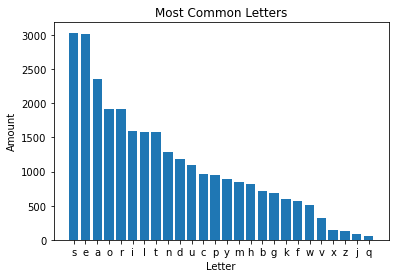

In [3]:
#Find the most common letters
import pandas as pd
import matplotlib.pyplot as plt
#make all lower
for word in tokens: 
    word.lower()

letter_dict = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0}

for word in tokens:
    for char in word:
        if char in letter_dict:
            letter_dict[char] += 1
        
sorted_letter_dict = dict(sorted(letter_dict.items(), key=lambda item: item[1], reverse=True))  
sorted_letter_dict

keys = sorted_letter_dict.keys()
values = sorted_letter_dict.values()
plt.title('Most Common Letters')
plt.xlabel("Letter")
plt.ylabel("Amount")
plt.bar(keys, values)

In [78]:

wordle_list = ["cigar","rebut","sissy","humph","awake","blush","focal","evade","naval","serve","heath","dwarf",
               "model","karma","stink","grade","quiet","bench","abate","feign","major","death","fresh","crust",
               "stool","colon","abase","marry","react","batty","pride","floss","helix","croak","staff","paper",
               "unfed","whelp","trawl","outdo","adobe","crazy","sower","repay","digit","crate","cluck","spike",
               "mimic","pound","maxim","linen","unmet","flesh","booby","forth","first","stand","belly","ivory",
               "seedy","print","yearn","drain","bribe","stout","panel","crass","flume","offal","agree","error",
               "swirl","argue","bleed","delta","flick","totem","wooer","front","shrub","parry","biome","lapel",
               "start","greet","goner","golem","lusty","loopy","round","audit","lying","gamma","labor","islet",
               "civic","forge","corny","moult","basic","salad","agate","spicy","spray","essay","fjord","spend",
               "kebab","guild","aback","motor","alone","hatch","hyper","thumb","dowry","ought","belch","dutch",
               "pilot","tweed","comet","jaunt","enema","steed","abyss","growl","fling","dozen","boozy","erode",
               "world","gouge","click","briar","great","altar","pulpy","blurt","coast","duchy","groin","fixer",
               "group","rogue","badly","smart","pithy","gaudy","chill","heron","vodka","finer","surer","radio",
               "rouge","perch","retch","wrote","clock","tilde","store","prove","bring","solve","cheat","grime",
               "exult","usher","epoch","triad","break","rhino","viral","conic","masse","sonic","vital","trace",
               "using","peach","champ","baton","brake","pluck","craze","gripe","weary","picky","acute","ferry",
               "aside","tapir","troll","unify","rebus","boost","truss","siege","tiger","banal","slump","crank",
               "gorge","query","drink","favor","abbey","tangy","panic","solar","shire","proxy","point","robot",
               "prick","wince","crimp","knoll","sugar","whack","mount","perky","could","wrung","light","those",
               "moist","shard","pleat","aloft","skill","elder","frame","humor","pause","ulcer","ultra","robin",
               "cynic","aroma","caulk","shake","dodge","swill","tacit","other","thorn","trove","bloke","vivid",
               "spill","chant","choke","rupee","nasty","mourn","ahead","brine","cloth","hoard","sweet","month",
               "lapse","watch","today","focus","smelt","tease","cater","movie","saute","allow","renew","their",
               "slosh","purge","chest","depot","epoxy","nymph","found","shall","harry","stove","lowly","snout",
               "trope","fewer","shawl","natal","comma","foray","scare","stair","black","squad","royal","chunk",
               "mince","shame","cheek","ample","flair","foyer","cargo","oxide","plant","olive","inert","askew",
               "heist","shown","zesty","hasty","trash","fella","larva","forgo","story","hairy","train","homer",
               "badge","midst","canny","fetus","butch","farce","slung","tipsy","metal","yield","delve","being",
               "scour","glass","gamer","scrap","money","hinge","album","vouch","asset","tiara","crept","bayou",
               "atoll","manor","creak","showy","phase","froth","depth","gloom","flood","trait","girth","piety",
               "payer","goose","float","donor","atone","primo","apron","blown","cacao","loser","input","gloat",
               "awful","brink","smite","beady","rusty","retro","droll","gawky","hutch","pinto","gaily","egret",
               "lilac","sever","field","fluff","hydro","flack","agape","voice","stead","stalk","berth","madam",
               "night","bland","liver","wedge","augur","roomy","wacky","flock","angry","bobby","trite","aphid",
               "tryst","midge","power","elope","cinch","motto","stomp","upset","bluff","cramp","quart","coyly",
               "youth","rhyme","buggy","alien","smear","unfit","patty","cling","glean","label","hunky","khaki",
               "poker","gruel","twice","twang","shrug","treat","unlit","waste","merit","woven","octal","needy",
               "clown","widow","irony","ruder","gauze","chief","onset","prize","fungi","charm","gully","inter",
               "whoop","taunt","leery","class","theme","lofty","tibia","booze","alpha","thyme","eclat","doubt",
               "parer","chute","stick","trice","alike","sooth","recap","saint","liege","glory","grate","admit",
               "brisk","soggy","usurp","scald","scorn","leave","twine","sting","bough","marsh","sloth","dandy",
               "vigor","howdy","enjoy","valid","ionic","equal","unset","floor","catch","spade","stein","exist",
               "quirk","denim","grove","spiel","mummy","fault","foggy","flout","carry","sneak","libel","waltz",
               "aptly","piney","inept","aloud","photo","dream","stale","vomit","ombre","fanny","unite","snarl",
               "baker","there","glyph","pooch","hippy","spell","folly","louse","gulch","vault","godly","threw",
               "fleet","grave","inane","shock","crave","spite","valve","skimp","claim","rainy","musty","pique",
               "daddy","quasi","arise","aging","valet","opium","avert","stuck","recut","mulch","genre","plume",
               "rifle","count","incur","total","wrest","mocha","deter","study","lover","safer","rivet","funny",
               "smoke","mound","undue","sedan","pagan","swine","guile","gusty","equip","tough","canoe","chaos",
               "covet","human","udder","lunch","blast","stray","manga","melee","lefty","quick","paste","given",
               "octet","risen","groan","leaky","grind","carve","loose","sadly","spilt","apple","slack","honey",
               "final","sheen","eerie","minty","slick","derby","wharf","spelt","coach","erupt","singe","price",
               "spawn","fairy","jiffy","filmy","stack","chose","sleep","ardor","nanny","niece","woozy","handy",
               "grace","ditto","stank","cream","usual","diode","valor","angle","ninja","muddy","chase","reply",
               "prone","spoil","heart","shade","diner","arson","onion","sleet","dowel","couch","palsy","bowel",
               "smile","evoke","creek","lance","eagle","idiot","siren","built","embed","award","dross","annul",
               "goody","frown","patio","laden","humid","elite","lymph","edify","might","reset","visit","gusto",
               "purse","vapor","crock","write","sunny","loath","chaff","slide","queer","venom","stamp","sorry",
               "still","acorn","aping","pushy","tamer","hater","mania","awoke","brawn","swift","exile","birch",
               "lucky","freer","risky","ghost","plier","lunar","winch","snare","nurse","house","borax","nicer",
               "lurch","exalt","about","savvy","toxin","tunic","pried","inlay","chump","lanky","cress","eater",
               "elude","cycle","kitty","boule","moron","tenet","place","lobby","plush","vigil","index","blink",
               "clung","qualm","croup","clink","juicy","stage","decay","nerve","flier","shaft","crook","clean",
               "china","ridge","vowel","gnome","snuck","icing","spiny","rigor","snail","flown","rabid","prose",
               "thank","poppy","budge","fiber","moldy","dowdy","kneel","track","caddy","quell","dumpy","paler",
               "swore","rebar","scuba","splat","flyer","horny","mason","doing","ozone","amply","molar","ovary",
               "beset","queue","cliff","magic","truce","sport","fritz","edict","twirl","verse","llama","eaten",
               "range","whisk","hovel","rehab","macaw","sigma","spout","verve","sushi","dying","fetid","brain",
               "buddy","thump","scion","candy","chord","basin","march","crowd","arbor","gayly","musky","stain",
               "dally","bless","bravo","stung","title","ruler","kiosk","blond","ennui","layer","fluid","tatty",
               "score","cutie","zebra","barge","matey","bluer","aider","shook","river","privy","betel","frisk",
               "bongo","begun","azure","weave","genie","sound","glove","braid","scope","wryly","rover","assay",
               "ocean","bloom","irate","later","woken","silky","wreck","dwelt","slate","smack","solid","amaze",
               "hazel","wrist","jolly","globe","flint","rouse","civil","vista","relax","cover","alive","beech",
               "jetty","bliss","vocal","often","dolly","eight","joker","since","event","ensue","shunt","diver",
               "poser","worst","sweep","alley","creed","anime","leafy","bosom","dunce","stare","pudgy","waive",
               "choir","stood","spoke","outgo","delay","bilge","ideal","clasp","seize","hotly","laugh","sieve",
               "block","meant","grape","noose","hardy","shied","drawl","daisy","putty","strut","burnt","tulip",
               "crick","idyll","vixen","furor","geeky","cough","naive","shoal","stork","bathe","aunty","check",
               "prime","brass","outer","furry","razor","elect","evict","imply","demur","quota","haven","cavil",
               "swear","crump","dough","gavel","wagon","salon","nudge","harem","pitch","sworn","pupil","excel",
               "stony","cabin","unzip","queen","trout","polyp","earth","storm","until","taper","enter","child",
               "adopt","minor","fatty","husky","brave","filet","slime","glint","tread","steal","regal","guest",
               "every","murky","share","spore","hoist","buxom","inner","otter","dimly","level","sumac","donut",
               "stilt","arena","sheet","scrub","fancy","slimy","pearl","silly","porch","dingo","sepia","amble",
               "shady","bread","friar","reign","dairy","quill","cross","brood","tuber","shear","posit","blank",
               "villa","shank","piggy","freak","which","among","fecal","shell","would","algae","large","rabbi",
               "agony","amuse","bushy","copse","swoon","knife","pouch","ascot","plane","crown","urban","snide",
               "relay","abide","viola","rajah","straw","dilly","crash","amass","third","trick","tutor","woody",
               "blurb","grief","disco","where","sassy","beach","sauna","comic","clued","creep","caste","graze",
               "snuff","frock","gonad","drunk","prong","lurid","steel","halve","buyer","vinyl","utile","smell",
               "adage","worry","tasty","local","trade","finch","ashen","modal","gaunt","clove","enact","adorn",
               "roast","speck","sheik","missy","grunt","snoop","party","touch","mafia","emcee","array","south",
               "vapid","jelly","skulk","angst","tubal","lower","crest","sweat","cyber","adore","tardy","swami",
               "notch","groom","roach","hitch","young","align","ready","frond","strap","puree","realm","venue",
               "swarm","offer","seven","dryer","diary","dryly","drank","acrid","heady","theta","junto","pixie",
               "quoth","bonus","shalt","penne","amend","datum","build","piano","shelf","lodge","suing","rearm",
               "coral","ramen","worth","psalm","infer","overt","mayor","ovoid","glide","usage","poise","randy",
               "chuck","prank","fishy","tooth","ether","drove","idler","swath","stint","while","begat","apply",
               "slang","tarot","radar","credo","aware","canon","shift","timer","bylaw","serum","three","steak",
               "iliac","shirk","blunt","puppy","penal","joist","bunny","shape","beget","wheel","adept","stunt",
               "stole","topaz","chore","fluke","afoot","bloat","bully","dense","caper","sneer","boxer","jumbo",
               "lunge","space","avail","short","slurp","loyal","flirt","pizza","conch","tempo","droop","plate",
               "bible","plunk","afoul","savoy","steep","agile","stake","dwell","knave","beard","arose","motif",
               "smash","broil","glare","shove","baggy","mammy","swamp","along","rugby","wager","quack","squat",
               "debit","mange","skate","ninth","joust","tramp","spurn","medal","micro","rebel","flank","learn",
               "nadir","maple","comfy","remit","gruff","ester","least","mogul","fetch","cause","oaken","aglow",
               "meaty","gaffe","shyly","racer","prowl","thief","stern","poesy","rocky","tweet","waist","spire",
               "grope","havoc","patsy","truly","forty","deity","uncle","swish","giver","preen","bevel","lemur",
               "draft","slope","annoy","lingo","bleak","ditty","curly","cedar","dirge","grown","horde","drool",
               "shuck","crypt","cumin","stock","gravy","locus","wider","breed","quite","chafe","cache","blimp",
               "deign","fiend","logic","cheap","elide","rigid","false","renal","pence","rowdy","shoot","blaze",
               "envoy","posse","brief","never","abort","mouse","mucky","sulky","fiery","media","trunk","yeast",
               "clear","skunk","scalp","bitty","cider","koala","duvet","segue","creme","super","grill","after",
               "owner","ember","reach","nobly","empty","speed","gipsy","recur","smock","dread","merge","burst",
               "kappa","amity","shaky","hover","carol","snort","synod","faint","haunt","flour","chair","detox",
               "shrew","tense","plied","quark","burly","novel","waxen","stoic","jerky","blitz","beefy","lyric",
               "hussy","towel","quilt","below","bingo","wispy","brash","scone","toast","easel","saucy","value",
               "spice","honor","route","sharp","bawdy","radii","skull","phony","issue","lager","swell","urine",
               "gassy","trial","flora","upper","latch","wight","brick","retry","holly","decal","grass","shack",
               "dogma","mover","defer","sober","optic","crier","vying","nomad","flute","hippo","shark","drier",
               "obese","bugle","tawny","chalk","feast","ruddy","pedal","scarf","cruel","bleat","tidal","slush",
               "semen","windy","dusty","sally","igloo","nerdy","jewel","shone","whale","hymen","abuse","fugue",
               "elbow","crumb","pansy","welsh","syrup","terse","suave","gamut","swung","drake","freed","afire",
               "shirt","grout","oddly","tithe","plaid","dummy","broom","blind","torch","enemy","again","tying",
               "pesky","alter","gazer","noble","ethos","bride","extol","decor","hobby","beast","idiom","utter",
               "these","sixth","alarm","erase","elegy","spunk","piper","scaly","scold","hefty","chick","sooty",
               "canal","whiny","slash","quake","joint","swept","prude","heavy","wield","femme","lasso","maize",
               "shale","screw","spree","smoky","whiff","scent","glade","spent","prism","stoke","riper","orbit",
               "cocoa","guilt","humus","shush","table","smirk","wrong","noisy","alert","shiny","elate","resin",
               "whole","hunch","pixel","polar","hotel","sword","cleat","mango","rumba","puffy","filly","billy",
               "leash","clout","dance","ovate","facet","chili","paint","liner","curio","salty","audio","snake",
               "fable","cloak","navel","spurt","pesto","balmy","flash","unwed","early","churn","weedy","stump",
               "lease","witty","wimpy","spoof","saner","blend","salsa","thick","warty","manic","blare","squib",
               "spoon","probe","crepe","knack","force","debut","order","haste","teeth","agent","widen","icily",
               "slice","ingot","clash","juror","blood","abode","throw","unity","pivot","slept","troop","spare",
               "sewer","parse","morph","cacti","tacky","spool","demon","moody","annex","begin","fuzzy","patch",
               "water","lumpy","admin","omega","limit","tabby","macho","aisle","skiff","basis","plank","verge",
               "botch","crawl","lousy","slain","cubic","raise","wrack","guide","foist","cameo","under","actor",
               "revue","fraud","harpy","scoop","climb","refer","olden","clerk","debar","tally","ethic","cairn",
               "tulle","ghoul","hilly","crude","apart","scale","older","plain","sperm","briny","abbot","rerun",
               "quest","crisp","bound","befit","drawn","suite","itchy","cheer","bagel","guess","broad","axiom",
               "chard","caput","leant","harsh","curse","proud","swing","opine","taste","lupus","gumbo","miner",
               "green","chasm","lipid","topic","armor","brush","crane","mural","abled","habit","bossy","maker",
               "dusky","dizzy","lithe","brook","jazzy","fifty","sense","giant","surly","legal","fatal","flunk",
               "began","prune","small","slant","scoff","torus","ninny","covey","viper","taken","moral","vogue",
               "owing","token","entry","booth","voter","chide","elfin","ebony","neigh","minim","melon","kneed",
               "decoy","voila","ankle","arrow","mushy","tribe","cease","eager","north","raspy","forum","drone",
               "birth","graph","odder","terra","weird","tried","clack","color","rough","leach","mouth","hound",
               "weigh","uncut","ladle","strip","craft","minus","dicey","titan","lucid","vicar","dress","going",
               "ditch","gypsy","pasta","taffy","flame","swoop","aloof","sight","broke","teary","snowy","attic",
               "chart","sixty","wordy","sheer","leper","nosey","bulge","savor","clamp","funky","snore","ripen",
               "foamy","toxic","brand","plumb","dingy","butte","drill","tripe","bicep","tenor","krill","worse",
               "drama","hyena","think","ratio","cobra","basil","scrum","bused","phone","court","camel","sully",
               "proof","heard","angel","petal","pouty","throb","maybe","fetal","sprig","spine","shout","cadet",
               "macro","dodgy","satyr","rarer","binge","trend","nutty","leapt","amiss","split","myrrh","width",
               "sonar","tower","baron","fever","waver","spark","belie","sloop","expel","smote","baler","above",
               "wafer","scant","frill","awash","snack","scowl","frail","drift","limbo","fence","motel","ounce",
               "wreak","revel","talon","prior","knelt","cello","flake","debug","anode","crime","salve","scout",
               "imbue","pinky","stave","vague","chock","fight","video","clump","tonal","bigot","peril","snaky",
               "stone","teach","cleft","frost","prawn","booty","twist","mossy","staid","hence","pinch","teddy",
               "apnea","stiff","plaza","ledge","tweak","board","grant","medic","bacon","cable","brawl","slunk",
               "women","mucus","boast","toddy","coven","tumor","truer","mangy","eying","inlet","crone","pulse",
               "wrath","stall","steam","axial","purer","daily","trail","niche","mealy","turbo","stoop","speak",
               "juice","nylon","plump","merry","flail","papal","wheat","berry","cower","await","press","whose",
               "erect","brute","leggy","snipe","sinew","skier","penny","jumpy","rally","daunt","scree","impel",
               "umbra","scary","modem","gross","avian","greed","satin","tonic","parka","wiser","junta","visor",
               "sniff","livid","stark","trump","giddy","reuse","taboo","avoid","quote","ficus","stash","decry",
               "devil","liken","gloss","gayer","beret","noise","gland","dealt","sling","gourd","brown","thrum",
               "rumor","opera","thigh","tonga","flare","wound","white","bulky","etude","plait","fleck","felon",
               "horse","circa","paddy","inbox","fizzy","grain","exert","surge","gleam","whine","petty","golly",
               "belle","salvo","crush","fruit","sappy","taker","tract","ovine","spiky","chirp","forte","alibi",
               "frank","reedy","filth","spasm","heave","mambo","right","clank","trust","dried","scene","known",
               "lumen","borne","spook","sauce","amber","lathe","carat","corer","dirty","magma","roost","woman",
               "slyly","affix","alloy","taint","sheep","kinky","wooly","mauve","flung","thong","punch","pasty",
               "yacht","fried","quail","brunt","grimy","curvy","cagey","rinse","deuce","downy","knead","whirl",
               "state","grasp","milky","bison","graft","sandy","baste","flask","hedge","rapid","clang","anger",
               "girly","swash","boney","coupe","endow","abhor","welch","blade","tight","drive","goofy","email",
               "geese","miser","mirth","cloud","cabal","leech","close","tenth","pecan","music","stuff","bleep",
               "droit","grail","clone","guise","ralph","tango","biddy","smith","mower","rider","mecca","folio",
               "payee","serif","drape","fifth","spank","glaze","allot","truck","kayak","setup","verso","quash",
               "virus","testy","tepee","fully","zonal","metro","curry","grand","banjo","fauna","gummy","happy",
               "axion","bezel","occur","chain","nasal","gooey","filer","brace","allay","newly","fussy","relic",
               "pubic","raven","plead","gnash","flaky","munch","dully","eking","thing","guava","ratty","fudge",
               "slink","hurry","theft","shorn","pygmy","ranch","wring","lemon","shore","femur","sleek","riser",
               "mamma","froze","newer","style","moose","antic","drown","vegan","chess","twixt","peace","flush",
               "guppy","union","lever","lorry","image","cabby","druid","exact","truth","catty","login","eject",
               "dopey","spear","cried","chime","crony","stunk","timid","batch","gauge","roger","rival","untie",
               "rotor","crack","curve","latte","witch","bunch","repel","anvil","soapy","meter","broth","madly",
               "piece","blame","haute","spied","undid","intro","basal","shine","gecko","rodeo","guard","steer",
               "loamy","scamp","scram","manly","hello","vaunt","organ","feral","knock","refit","extra","condo",
               "adapt","willy","polka","rayon","skirt","faith","torso","match","mercy","tepid","aorta","adult",
               "judge","rower","artsy","rural","shave"]

print(len(wordle_list))

2309


In [301]:
wordle_list.sort()

# Now we will make a list of common words based off the 10 most common letters
i = 0
common_letters = []
next_common = []
for key in sorted_letter_dict:
    if i < 5:
        common_letters.append(key)
    if i > 5 and i < 10:
        next_common.append(key)
    i += 1
    if i == 10:
        break
print(common_letters)
print(next_common)
best_start = []

for i in wordle_list: 
    temp_set = set()
    for char in i: 
        if char in common_letters:
            temp_set.add(char)
        
        if len(temp_set) >= 4:
            best_start.append(i)

vowels = ['a', 'e', 'i', 'o', 'u']
best_first_guess = []
for word in best_start:
    count = 0
    for char in word: 
        if char in vowels: 
            count += 1
    if count > 2: 
        if word not in best_first_guess:
            best_first_guess.append(word)
print(best_first_guess)        

['s', 'e', 'a', 'o', 'r']
['l', 't', 'n', 'd']
['adore', 'arise', 'arose', 'erase', 'opera', 'raise', 'rouse']


In [ ]:
import re
# First Guess

first_guess = input("What was your first guess?")
n = int(input('How many green letters'))

green_letters = []
yellow_letters = []
gray_letters = []
print("What were they? ")
for i in range(0, n):
    ele = str(input())
    green_letters.append(ele)

m = int(input('How many yellow letters'))

print("What were they? ")
for i in range(0, m):
    ele = str(input())
    yellow_letters.append(ele)
    
p = int(input('How many gray letters'))

print("What were they? ")
for i in range(0, p):
    ele = str(input())
    gray_letters.append(ele)

######## 
    
# print(green_letters)
# print(yellow_letters)
# print(gray_letters)
firstg_length = len(green_letters)
firsty_length = len(yellow_letters)



########



index = {}
for i in green_letters: 
    
    index[i] = first_guess.find(i)

for i in yellow_letters: 
    
    index[i] = first_guess.find(i)

r_zero = 0
r_one = 0
r_two = 0
r_three = 0
r_four = 0
r_list = []

for key in index: 
    if index[key] == 0: 
        r_zero = key
    elif index[key] == 1: 
        r_one = key
    elif index[key] == 2: 
        r_two = key
    elif index[key] == 3: 
        r_three = key
    elif index[key] == 4: 
        r_four = key
        
r_list.append(r_zero)
r_list.append(r_one)
r_list.append(r_two)
r_list.append(r_three)
r_list.append(r_four) 
    
#print(r_list)


string = ''
for i in r_list:
    if i == 0: 
        string += '[a-z]'
    else:
        if i in yellow_letters:
            string += '[^'+i+']'
        else:
            string += '['+i+']'

#print(string)


r = re.compile("%s" % string)
templist = list(filter(r.match, wordle_list))  # Note 1

#print(templist)

new_list = []

for word in templist: 
    flag = 0
    for char in word:
        flag = 1
        if char in gray_letters:
            flag = 0
        if flag == 1: 
            if char not in new_list:
                new_list.append(char)
            
#print(new_list)
for i in green_letters:
    if i not in new_list:
        new_list.append(i)
# print()
#print(new_list)
# print()
temp_list = []    

for word in templist:
    flag = 0
    for char in word: 
        if char not in new_list: 
            flag = 1
            
    if flag == 0: 
        temp_list.append(word)
        
# print()
#print(temp_list)
# print()
final_list = []
# print(len(yellow_letters))
if len(yellow_letters) > 0:
    for word in temp_list: 
        flag = 0
        for char in word: 
            if char in yellow_letters: 
                flag += 1
        len(yellow_letters)
        if flag == len(yellow_letters): 
            final_list.append(word)
else:
    final_list = temp_list


best_final = []
for word in final_list:
    for char in word:
        if char in next_common:
            if word not in best_final:
                best_final.append(word)

        
print()
print("NOTE: Try and choose a word from this list that doesn't have double letters. I haven't made the algorithm take care   of double letters yet.")
print("Best second guesses: ")
print(best_final)
print()
print("All options for second guess: ")
print(final_list)


In [323]:
# Second Guess
correct = input("Did you get it correct? (yes/no)")
if correct == 'yes':
    print("Amazing job, congrats!")
    wordle_list.remove(first_guess)
else:
    first_guess = input("What was your second guess?")
    n = int(input('How many green letters'))

    print("What were they? ")
    for i in range(0, n):
        ele = str(input())
        if ele not in green_letters:
            green_letters.append(ele)

    m = int(input('How many yellow letters'))

    print("What were they? ")
    for i in range(0, m):
        ele = str(input())
        if ele not in yellow_letters:
            yellow_letters.append(ele)

    p = int(input('How many gray letters'))

    print("What were they? ")
    for i in range(0, p):
        ele = str(input())
        if ele not in gray_letters:
            gray_letters.append(ele)


    #######

    # print(green_letters)
    # print(yellow_letters)
    # print(gray_letters)
    secondg_length = len(green_letters)
    secondy_length = len(yellow_letters)

    #######


    for char in green_letters:
        if char in yellow_letters:
            yellow_letters.remove(char)

    if secondg_length != firstg_length or secondy_length != firsty_length:
        index = {}
        for i in green_letters: 

            index[i] = first_guess.find(i)

        for i in yellow_letters: 

            index[i] = first_guess.find(i)

        r_zero = 0
        r_one = 0
        r_two = 0
        r_three = 0
        r_four = 0
        r_list = []

        for key in index: 
            if index[key] == 0: 
                r_zero = key
            elif index[key] == 1: 
                r_one = key
            elif index[key] == 2: 
                r_two = key
            elif index[key] == 3: 
                r_three = key
            elif index[key] == 4: 
                r_four = key

        r_list.append(r_zero)
        r_list.append(r_one)
        r_list.append(r_two)
        r_list.append(r_three)
        r_list.append(r_four) 

        #print(r_list)


        string = ''
        for i in r_list:
            if i == 0: 
                string += '[a-z]'
            else:
                if i in yellow_letters:
                    string += '[^'+i+']'
                else:
                    string += '['+i+']'
        #print(string)


        r = re.compile("%s" % string)
        templist = list(filter(r.match, wordle_list))  # Note 1

        #print(templist)

    new_list = []

    for word in templist: 
        flag = 0
        for char in word:
            flag = 1
            if char in gray_letters:
                flag = 0
            if flag == 1: 
                if char not in new_list:
                    new_list.append(char)

    #print(new_list)
    for i in green_letters:
        if i not in new_list:
            new_list.append(i)
    # print()
    # print(new_list)
    # print()
    temp_list = []    

    for word in templist:
        flag = 0
        for char in word: 
            if char not in new_list: 
                flag = 1

        if flag == 0: 
            temp_list.append(word)


    # print(temp_list)
    # print()
    final_list = []

    if len(yellow_letters) != 0:
        for word in temp_list:
            flag = 0
            for char in word: 
                if char in yellow_letters: 
                    flag += 1
            if flag == len(yellow_letters): 
                final_list.append(word)
    else:
        final_list = temp_list

    best_final = []
    for word in final_list:
        for char in word:
            if char in next_common:
                if word not in best_final:
                    best_final.append(word)


    print()
    print("NOTE: Try and choose a word from this list that doesn't have double letters. I haven't made the algorithm take care   of double letters yet.")
    print("Best second guesses: ")
    print(best_final)
    print()
    print("All options for second guess: ")
    print(final_list)
    

Did you get it correct? (yes/no)no
What was your second guess?bland
How many green letters0
What were they? 
How many yellow letters1
What were they? 
l
How many gray letters4
What were they? 
b
a
n
d

NOTE: Try and choose a word from this list that doesn't have double letters. I haven't made the algorithm take care   of double letters yet.
Best second guesses: 
[]

All options for second guess: 
[]


In [324]:
# Third Guess
correct = input("Did you get it correct? (yes/no)")
if correct == 'yes':
    print("Amazing job, congrats!")
    wordle_list.remove(first_guess)
else:
    first_guess = input("What was your third guess?")
    n = int(input('How many green letters'))

    print("What were they? ")
    for i in range(0, n):
        ele = str(input())
        if ele not in green_letters:
            green_letters.append(ele)

    m = int(input('How many yellow letters'))

    print("What were they? ")
    for i in range(0, m):
        ele = str(input())
        if ele not in yellow_letters:
            yellow_letters.append(ele)

    p = int(input('How many gray letters'))

    print("What were they? ")
    for i in range(0, p):
        ele = str(input())
        if ele not in gray_letters:
            gray_letters.append(ele)

            
    ###########

    # print(green_letters)
    # print(yellow_letters)
    # print(gray_letters)
    thirdg_length = len(green_letters)
    thirdy_length = len(yellow_letters)

    ###########



    for char in green_letters:
        if char in yellow_letters:
            yellow_letters.remove(char)

    if secondg_length != thirdg_length or secondy_length != thirdy_length:
        index = {}
        for i in green_letters: 

            index[i] = first_guess.find(i)

        for i in yellow_letters: 

            index[i] = first_guess.find(i)

        r_zero = 0
        r_one = 0
        r_two = 0
        r_three = 0
        r_four = 0
        r_list = []

        for key in index: 
            if index[key] == 0: 
                r_zero = key
            elif index[key] == 1: 
                r_one = key
            elif index[key] == 2: 
                r_two = key
            elif index[key] == 3: 
                r_three = key
            elif index[key] == 4: 
                r_four = key

        r_list.append(r_zero)
        r_list.append(r_one)
        r_list.append(r_two)
        r_list.append(r_three)
        r_list.append(r_four) 

        #print(r_list)


        string = ''
        for i in r_list:
            if i == 0: 
                string += '[a-z]'
            else:
                if i in yellow_letters:
                    string += '[^'+i+']'
                else:
                    string += '['+i+']'
        #print(string)


        r = re.compile("%s" % string)
        templist = list(filter(r.match, wordle_list))  # Note 1

        #print(templist)

    new_list = []

    for word in templist: 
        flag = 0
        for char in word:
            flag = 1
            if char in gray_letters:
                flag = 0
            if flag == 1: 
                if char not in new_list:
                    new_list.append(char)

    #print(new_list)
    for i in green_letters:
        if i not in new_list:
            new_list.append(i)
    # print()
    # print(new_list)
    # print()
    temp_list = []    

    for word in templist:
        flag = 0
        for char in word: 
            if char not in new_list: 
                flag = 1

        if flag == 0: 
            temp_list.append(word)


    # print(temp_list)
    # print()
    final_list = []

    if len(yellow_letters) != 0:
        for word in temp_list: 
            flag = 0
            for char in word: 
                if char in yellow_letters: 
                    flag += 1
            if flag == len(yellow_letters): 
                final_list.append(word)
    else:
        final_list = temp_list

    best_final = []
    for word in final_list:
        for char in word:
            if char in next_common:
                if word not in best_final:
                    best_final.append(word)


    print()
    print("NOTE: Try and choose a word from this list that doesn't have double letters. I haven't made the algorithm take care   of double letters yet.")
    print("Best second guesses: ")
    print(best_final)
    print()
    print("All options for second guess: ")
    print(final_list)


KeyboardInterrupt: Interrupted by user

In [274]:
# Fourth Guess
correct = input("Did you get it correct? (yes/no)")
if correct == 'yes':
    print("Amazing job, congrats!")
    wordle_list.remove(first_guess)
else:
    first_guess = input("What was your fourth guess?")
    n = int(input('How many green letters'))

    print("What were they? ")
    for i in range(0, n):
        ele = str(input())
        if ele not in green_letters:
            green_letters.append(ele)

    m = int(input('How many yellow letters'))

    print("What were they? ")
    for i in range(0, m):
        ele = str(input())
        if ele not in yellow_letters:
            yellow_letters.append(ele)

    p = int(input('How many gray letters'))

    print("What were they? ")
    for i in range(0, p):
        ele = str(input())
        if ele not in gray_letters:
            gray_letters.append(ele)

            
    ###########

    # print(green_letters)
    # print(yellow_letters)
    # print(gray_letters)
    thirdg_length = len(green_letters)
    thirdy_length = len(yellow_letters)

    ###########



    for char in green_letters:
        if char in yellow_letters:
            yellow_letters.remove(char)

    if secondg_length != thirdg_length or secondy_length != thirdy_length:
        index = {}
        for i in green_letters: 

            index[i] = first_guess.find(i)

        for i in yellow_letters: 

            index[i] = first_guess.find(i)

        r_zero = 0
        r_one = 0
        r_two = 0
        r_three = 0
        r_four = 0
        r_list = []

        for key in index: 
            if index[key] == 0: 
                r_zero = key
            elif index[key] == 1: 
                r_one = key
            elif index[key] == 2: 
                r_two = key
            elif index[key] == 3: 
                r_three = key
            elif index[key] == 4: 
                r_four = key

        r_list.append(r_zero)
        r_list.append(r_one)
        r_list.append(r_two)
        r_list.append(r_three)
        r_list.append(r_four) 

        #print(r_list)


        string = ''
        for i in r_list:
            if i == 0: 
                string += '[a-z]'
            else:
                if i in yellow_letters:
                    string += '[^'+i+']'
                else:
                    string += '['+i+']'
        #print(string)


        r = re.compile("%s" % string)
        templist = list(filter(r.match, wordle_list))  # Note 1

        #print(templist)

    new_list = []

    for word in templist: 
        flag = 0
        for char in word:
            flag = 1
            if char in gray_letters:
                flag = 0
            if flag == 1: 
                if char not in new_list:
                    new_list.append(char)

    #print(new_list)
    for i in green_letters:
        if i not in new_list:
            new_list.append(i)
    # print()
    # print(new_list)
    # print()
    temp_list = []    

    for word in templist:
        flag = 0
        for char in word: 
            if char not in new_list: 
                flag = 1

        if flag == 0: 
            temp_list.append(word)


    # print(temp_list)
    # print()
    final_list = []

    if len(yellow_letters) != 0:
        for word in temp_list: 
            flag = 0
            for char in word: 
                if char in yellow_letters: 
                    flag += 1
            if flag == len(yellow_letters): 
                final_list.append(word)
    else:
        final_list = temp_list

    best_final = []
    for word in final_list:
        for char in word:
            if char in next_common:
                if word not in best_final:
                        best_final.append(word)



    print()
    print("NOTE: Try and choose a word from this list that doesn't have double letters. I haven't made the algorithm take care   of double letters yet.")
    print("Best second guesses: ")
    print(best_final)
    print()
    print("All options for second guess: ")
    print(final_list)


Did you get it correct? (yes/no)no
What was your fourth guess?ivory
How many green letters3
What were they? 
o
r
y
How many yellow letters0
What were they? 
How many gray letters2
What were they? 
i
v

Best fifth guesses: 

['glory']
